In [1]:
import torch

print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device Name:", torch.cuda.get_device_name(0))
    print("CUDA Version:", torch.version.cuda)


CUDA Available: True
Device Name: NVIDIA GeForce RTX 3060 Laptop GPU
CUDA Version: 12.6


In [11]:
import pandas as pd 

data = pd.read_csv('../dataset/icml_face_data.csv')


In [24]:
data['emotion'].value_counts(normalize=True)*100

emotion
3    25.048068
6    17.270878
4    16.933709
2    14.269791
0    13.801655
5    11.151671
1     1.524229
Name: proportion, dtype: float64

In [21]:
data[data['emotion'] == 3]

,emotion,Usage,pixels
7,3,Training,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,Training,85 84 90 121 101 102 133 153 153 169 177 189 1...
14,3,Training,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...
16,3,Training,14 14 18 28 27 22 21 30 42 61 77 86 88 95 100 ...
24,3,Training,252 250 246 229 182 140 98 72 53 44 67 95 95 8...
...,...,...,...
35867,3,PrivateTest,198 198 197 196 196 197 196 196 196 195 196 18...
35869,3,PrivateTest,217 220 222 223 223 224 225 223 223 225 223 22...
35878,3,PrivateTest,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...


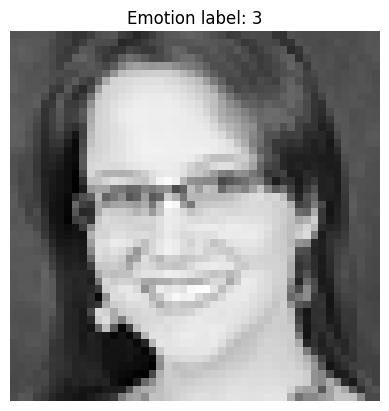

In [22]:
import numpy as np
import matplotlib.pyplot as plt
id = 7
label = int(data.iloc[id]['emotion'])
pixel_seq = data.iloc[id, 2]
image = np.fromstring(pixel_seq, sep=' ', dtype=np.uint8).reshape(48, 48)

plt.imshow(image, cmap='gray')  # Show as grayscale
plt.title(f'Emotion label: {label}')
plt.axis('off')  # Hide axis ticks
plt.show()


In [4]:
import sys
sys.path.append("..")  # or "." depending on notebook location

import yaml 

with open("../cfgs/cnn_fer.yaml","r") as f:
    cfg = yaml.safe_load(f)


In [5]:
import sys
sys.path.append("..")  # or "." depending on notebook location

import yaml 
from utils.dataset import DataModule
from torchvision import transforms

# Define any transform (optional)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),        # Flip images horizontally
    transforms.RandomRotation(degrees=10),         # Slight random rotation
    transforms.RandomCrop(48, padding=4),          # Random crop with padding
    # transforms.ToTensor(),                         # Convert to tensor (if not already)
    transforms.Normalize(mean=[0.5], std=[0.5]),   # Normalize
])

with open("../cfgs/cnn_fer.yaml","r") as f:
    cfg = yaml.safe_load(f)
data_cfg = cfg['data_args']
dm = DataModule(
    path=data_cfg['path'],
    transform=transform,
    batch_size=data_cfg['batch_size'],
    num_workers=data_cfg['num_workers'],
    shuffle=True,
    pin_memory=data_cfg['pin_memory']
)

In [6]:
from models.convnetfer_model import ConvNetFer
import torch.nn as nn

# cfg['model_args']['activation'] = eval( cfg['model_args']['activation'])  # e.g., 'nn.ReLU' → nn.ReLU
# cfg['model_args']['norm_layer'] = eval(cfg['model_args']['norm_layer'])
#model = eval(cfg['model_name'])(**cfg['model_args'])


In [7]:
train_loader = dm.get_train_loader()
eval_loader = dm.get_val_loader()

In [8]:
from trainers.cnn_trainer import CNNTrainer

cnn_trainer = CNNTrainer(config = cfg, log_dir='../log/',train_loader=train_loader,eval_loader=eval_loader)

Sequential(
  (0): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Dropout(p=0.3, inplace=False)
  (5): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU(inplace=True)
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Dropout(p=0.3, inplace=False)
  (10): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Dropout(p=0.3, inplace=False)
  (15): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), pa

In [9]:
cnn_trainer.model

ConvNetFer(
  (layers): Sequential(
    (0): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.3, inplace=False)
    (5): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.3, inplace=False)
    (10): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.3, inplace=False)
    (15

In [10]:
cnn_trainer.train()

Epoch 1/50:  67%|██████▋   | 38/57 [00:17<00:08,  2.16batch/s, loss=1.8287]


KeyboardInterrupt: 

In [1]:
import sys
sys.path.append("..")  # or "." depending on notebook location

import yaml 
from utils.dataset import DataModule
from torchvision import transforms

# Define any transform (optional)
transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert tensor to PIL for augmentations
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.RandomCrop(48, padding=4),
    transforms.ToTensor(),  # Back to tensor, now in [0,1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

with open("../cfgs/resnet_fer.yaml","r") as f:
    cfg = yaml.safe_load(f)
data_cfg = cfg['data_args']
dm = DataModule(
    path=data_cfg['path'],
    transform=transform,
    batch_size=data_cfg['batch_size'],
    num_workers=data_cfg['num_workers'],
    shuffle=True,
    pin_memory=data_cfg['pin_memory']
)

In [2]:
train_loader = dm.get_train_loader()
eval_loader = dm.get_val_loader()

In [3]:
%load_ext autoreload
%autoreload 2

from trainers.resnet_trainer import ResNetTrainer

resnet_trainer = ResNetTrainer(config = cfg, log_dir='../log/',train_loader=train_loader,eval_loader=eval_loader)

/home/dior00002/HLCV/project/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dior00002/HLCV/project/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
resnet_trainer.train()

Epoch 1/50: 100%|██████████| 57/57 [00:15<00:00,  3.79batch/s, loss=1.7578]


Epoch 1/50 Train Loss: 1.5535 Acc: 0.4122 | Val Loss: 1.8784 Acc: 0.2728


Epoch 2/50: 100%|██████████| 57/57 [00:15<00:00,  3.75batch/s, loss=0.9764]


Epoch 2/50 Train Loss: 1.2733 Acc: 0.5148 | Val Loss: 1.6136 Acc: 0.3619


Epoch 3/50: 100%|██████████| 57/57 [00:15<00:00,  3.77batch/s, loss=1.1317]


Epoch 3/50 Train Loss: 1.1687 Acc: 0.5586 | Val Loss: 1.5367 Acc: 0.3870


Epoch 4/50: 100%|██████████| 57/57 [00:15<00:00,  3.72batch/s, loss=1.4069]


Epoch 4/50 Train Loss: 1.1211 Acc: 0.5755 | Val Loss: 1.4331 Acc: 0.4193


Epoch 5/50: 100%|██████████| 57/57 [00:15<00:00,  3.80batch/s, loss=0.7508]


Epoch 5/50 Train Loss: 1.0862 Acc: 0.5925 | Val Loss: 1.5363 Acc: 0.3848


Epoch 6/50: 100%|██████████| 57/57 [00:14<00:00,  3.85batch/s, loss=0.9777]


Epoch 6/50 Train Loss: 1.0409 Acc: 0.6090 | Val Loss: 1.3902 Acc: 0.4492


Epoch 7/50: 100%|██████████| 57/57 [00:16<00:00,  3.55batch/s, loss=1.0236]


Epoch 7/50 Train Loss: 1.0331 Acc: 0.6123 | Val Loss: 1.3363 Acc: 0.4776


Epoch 8/50: 100%|██████████| 57/57 [00:15<00:00,  3.69batch/s, loss=1.1389]


Epoch 8/50 Train Loss: 1.0059 Acc: 0.6216 | Val Loss: 1.5026 Acc: 0.4469


Epoch 9/50: 100%|██████████| 57/57 [00:15<00:00,  3.68batch/s, loss=1.0712]


Epoch 9/50 Train Loss: 1.0635 Acc: 0.5972 | Val Loss: 1.4611 Acc: 0.4542


Epoch 10/50: 100%|██████████| 57/57 [00:15<00:00,  3.64batch/s, loss=1.0080]


Epoch 10/50 Train Loss: 1.0218 Acc: 0.6160 | Val Loss: 1.3998 Acc: 0.4634


Epoch 11/50: 100%|██████████| 57/57 [00:15<00:00,  3.68batch/s, loss=0.7806]


Epoch 11/50 Train Loss: 0.9663 Acc: 0.6362 | Val Loss: 1.3815 Acc: 0.4776


Epoch 12/50: 100%|██████████| 57/57 [00:15<00:00,  3.63batch/s, loss=0.8285]


Epoch 12/50 Train Loss: 0.9498 Acc: 0.6445 | Val Loss: 1.3607 Acc: 0.4840


Epoch 13/50: 100%|██████████| 57/57 [00:15<00:00,  3.61batch/s, loss=1.1034]


Epoch 13/50 Train Loss: 0.9201 Acc: 0.6544 | Val Loss: 1.3758 Acc: 0.4767


Epoch 14/50: 100%|██████████| 57/57 [00:15<00:00,  3.69batch/s, loss=1.2707]


Epoch 14/50 Train Loss: 0.9185 Acc: 0.6560 | Val Loss: 1.4854 Acc: 0.4327


Epoch 15/50: 100%|██████████| 57/57 [00:17<00:00,  3.30batch/s, loss=0.7032]


Epoch 15/50 Train Loss: 0.9198 Acc: 0.6522 | Val Loss: 1.4208 Acc: 0.4249


Epoch 16/50: 100%|██████████| 57/57 [00:17<00:00,  3.34batch/s, loss=0.8560]


Epoch 16/50 Train Loss: 0.8746 Acc: 0.6729 | Val Loss: 1.3712 Acc: 0.4918


Epoch 17/50: 100%|██████████| 57/57 [00:16<00:00,  3.55batch/s, loss=0.7054]


Epoch 17/50 Train Loss: 0.8559 Acc: 0.6796 | Val Loss: 1.5143 Acc: 0.4422


Epoch 18/50: 100%|██████████| 57/57 [00:16<00:00,  3.46batch/s, loss=0.9162]


Epoch 18/50 Train Loss: 0.8468 Acc: 0.6829 | Val Loss: 1.3907 Acc: 0.4896


Epoch 19/50: 100%|██████████| 57/57 [00:16<00:00,  3.44batch/s, loss=1.1950]


Epoch 19/50 Train Loss: 0.8299 Acc: 0.6872 | Val Loss: 1.6295 Acc: 0.3851


Epoch 20/50: 100%|██████████| 57/57 [00:17<00:00,  3.25batch/s, loss=0.7551]


Epoch 20/50 Train Loss: 0.8332 Acc: 0.6865 | Val Loss: 1.4886 Acc: 0.4536


Epoch 21/50: 100%|██████████| 57/57 [00:16<00:00,  3.56batch/s, loss=0.8837]


Epoch 21/50 Train Loss: 0.8146 Acc: 0.6957 | Val Loss: 1.5306 Acc: 0.4497


Epoch 22/50: 100%|██████████| 57/57 [00:15<00:00,  3.60batch/s, loss=0.7699]


Epoch 22/50 Train Loss: 0.8120 Acc: 0.6939 | Val Loss: 1.5589 Acc: 0.4436


Epoch 23/50: 100%|██████████| 57/57 [00:16<00:00,  3.53batch/s, loss=0.9146]


Epoch 23/50 Train Loss: 0.7914 Acc: 0.7046 | Val Loss: 1.7218 Acc: 0.4101


Epoch 24/50: 100%|██████████| 57/57 [00:16<00:00,  3.54batch/s, loss=1.0295]


Epoch 24/50 Train Loss: 0.7712 Acc: 0.7117 | Val Loss: 1.9195 Acc: 0.3675


Epoch 25/50: 100%|██████████| 57/57 [00:16<00:00,  3.55batch/s, loss=0.7781]


Epoch 25/50 Train Loss: 0.7660 Acc: 0.7156 | Val Loss: 1.7611 Acc: 0.3954


Epoch 26/50: 100%|██████████| 57/57 [00:15<00:00,  3.59batch/s, loss=0.7821]


Epoch 26/50 Train Loss: 0.7472 Acc: 0.7192 | Val Loss: 1.6251 Acc: 0.4344


Epoch 27/50: 100%|██████████| 57/57 [00:16<00:00,  3.42batch/s, loss=0.7925]


Epoch 27/50 Train Loss: 0.7514 Acc: 0.7178 | Val Loss: 1.8328 Acc: 0.3837


Epoch 28/50: 100%|██████████| 57/57 [00:15<00:00,  3.65batch/s, loss=0.8338]


Epoch 28/50 Train Loss: 0.7404 Acc: 0.7253 | Val Loss: 1.6283 Acc: 0.4018


Epoch 29/50: 100%|██████████| 57/57 [00:15<00:00,  3.65batch/s, loss=1.0775]


Epoch 29/50 Train Loss: 0.6960 Acc: 0.7377 | Val Loss: 1.8456 Acc: 0.3787


Epoch 30/50: 100%|██████████| 57/57 [00:15<00:00,  3.65batch/s, loss=0.5445]


Epoch 30/50 Train Loss: 0.6931 Acc: 0.7401 | Val Loss: 1.8173 Acc: 0.4051


Epoch 31/50: 100%|██████████| 57/57 [00:15<00:00,  3.67batch/s, loss=0.9043]


Epoch 31/50 Train Loss: 0.6606 Acc: 0.7546 | Val Loss: 2.0691 Acc: 0.3982


Epoch 32/50: 100%|██████████| 57/57 [00:15<00:00,  3.62batch/s, loss=0.6939]


Epoch 32/50 Train Loss: 0.6642 Acc: 0.7538 | Val Loss: 2.1442 Acc: 0.3330


Epoch 33/50: 100%|██████████| 57/57 [00:15<00:00,  3.59batch/s, loss=0.6608]


Epoch 33/50 Train Loss: 0.6288 Acc: 0.7679 | Val Loss: 1.8130 Acc: 0.4071


Epoch 34/50: 100%|██████████| 57/57 [00:16<00:00,  3.48batch/s, loss=0.4438]


Epoch 34/50 Train Loss: 0.6118 Acc: 0.7717 | Val Loss: 1.7947 Acc: 0.4544


Epoch 35/50: 100%|██████████| 57/57 [00:16<00:00,  3.50batch/s, loss=0.5633]


Epoch 35/50 Train Loss: 0.5868 Acc: 0.7816 | Val Loss: 2.7115 Acc: 0.3179


Epoch 36/50: 100%|██████████| 57/57 [00:15<00:00,  3.58batch/s, loss=0.7465]


Epoch 36/50 Train Loss: 0.5875 Acc: 0.7836 | Val Loss: 2.4537 Acc: 0.3970


Epoch 37/50: 100%|██████████| 57/57 [00:15<00:00,  3.62batch/s, loss=0.7472]


Epoch 37/50 Train Loss: 0.6910 Acc: 0.7448 | Val Loss: 2.1630 Acc: 0.3700


Epoch 38/50: 100%|██████████| 57/57 [00:16<00:00,  3.51batch/s, loss=0.9153]


Epoch 38/50 Train Loss: 0.5738 Acc: 0.7878 | Val Loss: 2.3764 Acc: 0.3452


Epoch 39/50: 100%|██████████| 57/57 [00:15<00:00,  3.58batch/s, loss=0.5442]


Epoch 39/50 Train Loss: 0.5706 Acc: 0.7860 | Val Loss: 2.6872 Acc: 0.3243


Epoch 40/50: 100%|██████████| 57/57 [00:15<00:00,  3.63batch/s, loss=0.4359]


Epoch 40/50 Train Loss: 0.5860 Acc: 0.7850 | Val Loss: 3.1584 Acc: 0.2680


Epoch 41/50: 100%|██████████| 57/57 [00:16<00:00,  3.39batch/s, loss=0.7865]


Epoch 41/50 Train Loss: 0.5333 Acc: 0.8009 | Val Loss: 2.6149 Acc: 0.3048


Epoch 42/50: 100%|██████████| 57/57 [00:16<00:00,  3.52batch/s, loss=0.6473]


Epoch 42/50 Train Loss: 0.5139 Acc: 0.8098 | Val Loss: 2.2468 Acc: 0.3948


Epoch 43/50: 100%|██████████| 57/57 [00:16<00:00,  3.47batch/s, loss=0.4473]


Epoch 43/50 Train Loss: 0.5017 Acc: 0.8172 | Val Loss: 2.9258 Acc: 0.3558


Epoch 44/50: 100%|██████████| 57/57 [00:17<00:00,  3.18batch/s, loss=0.5287]


Epoch 44/50 Train Loss: 0.4733 Acc: 0.8252 | Val Loss: 3.7379 Acc: 0.3082


Epoch 45/50: 100%|██████████| 57/57 [00:16<00:00,  3.45batch/s, loss=0.6475]


Epoch 45/50 Train Loss: 0.4549 Acc: 0.8337 | Val Loss: 3.1378 Acc: 0.3316


Epoch 46/50: 100%|██████████| 57/57 [00:17<00:00,  3.34batch/s, loss=0.2471]


Epoch 46/50 Train Loss: 0.4673 Acc: 0.8275 | Val Loss: 3.4510 Acc: 0.2616


Epoch 47/50: 100%|██████████| 57/57 [00:17<00:00,  3.24batch/s, loss=0.3796]


Epoch 47/50 Train Loss: 0.3921 Acc: 0.8556 | Val Loss: 3.2304 Acc: 0.3143


Epoch 48/50: 100%|██████████| 57/57 [00:16<00:00,  3.37batch/s, loss=0.6911]


Epoch 48/50 Train Loss: 0.3969 Acc: 0.8533 | Val Loss: 2.8149 Acc: 0.3583


Epoch 49/50: 100%|██████████| 57/57 [00:16<00:00,  3.46batch/s, loss=0.6495]


Epoch 49/50 Train Loss: 0.4495 Acc: 0.8343 | Val Loss: 3.8886 Acc: 0.3190


Epoch 50/50: 100%|██████████| 57/57 [00:16<00:00,  3.49batch/s, loss=0.6639]


Epoch 50/50 Train Loss: 0.4205 Acc: 0.8465 | Val Loss: 2.7488 Acc: 0.3608


Epoch 51/50: 100%|██████████| 57/57 [00:16<00:00,  3.41batch/s, loss=0.3222]


Epoch 51/50 Train Loss: 0.4050 Acc: 0.8510 | Val Loss: 3.2820 Acc: 0.3402
